Import the required libraries and modules that you would need.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

### Read that data into Python and call the dataframe churnData.

In [109]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [110]:
churnData


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [111]:
churnData = churnData.replace('^\s*$',np.nan, regex = True)

In [112]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'])

In [113]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Check for null values in the dataframe. Replace the null values

In [114]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [115]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))

In [116]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [117]:
y = churnData['Churn']

In [118]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

### Switching the y from yes and no to 1(yes) and 0 (No)

In [119]:
y = pd.Series(y)

In [128]:
#churnData['Churn'] = churnData['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
churnData = churnData.replace(to_replace = ['Yes','No'],value = [1,0])
churnData = churnData.replace({'Churn': {'Yes': 1, 'No': 0}})

In [129]:
y = churnData['Churn']

In [130]:
np.unique(y)

array([0, 1], dtype=int64)

In [131]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [134]:
churnData['Churn'] = pd.to_numeric(churnData['Churn'])

### Split the data into a training set and a test set

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


### Scale the features either by using normalizer or a standard scaler

In [136]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### (optional)Fit a logistic Regression model on the training data

In [137]:
log_model = LogisticRegression() 
log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.789670,0.797019
1,Precision,0.648833,0.674242
2,Recall,0.447351,0.470899


### Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data

In [138]:
X.describe()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692,2283.300441
std,24.559481,0.368612,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,9.000000,0.000000,35.500000,402.225000
50%,29.000000,0.000000,70.350000,1400.550000
75%,55.000000,0.000000,89.850000,3786.600000
max,72.000000,1.000000,118.750000,8684.800000


In [139]:
y.value_counts(normalize=False)

0    5174
1    1869
Name: Churn, dtype: int64

In [140]:
TT_SPLIT = 0.2     
RAND_STATE = 123

In [141]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [159]:
model = KNeighborsClassifier(n_neighbors= 5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [160]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [162]:
y_test.head(5)

941     0
1404    0
5515    0
3684    0
7017    0
Name: Churn, dtype: int64

### Confusion Matrix

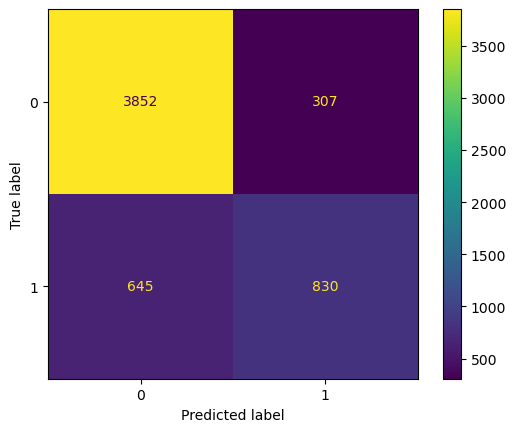

In [163]:
cm = confusion_matrix(y_train, y_pred_train, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

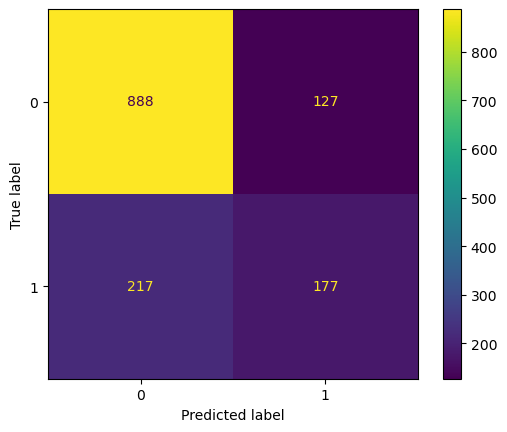

In [164]:
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [165]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [166]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.83,0.76
1,Precision,0.73,0.58
2,Recall,0.56,0.45


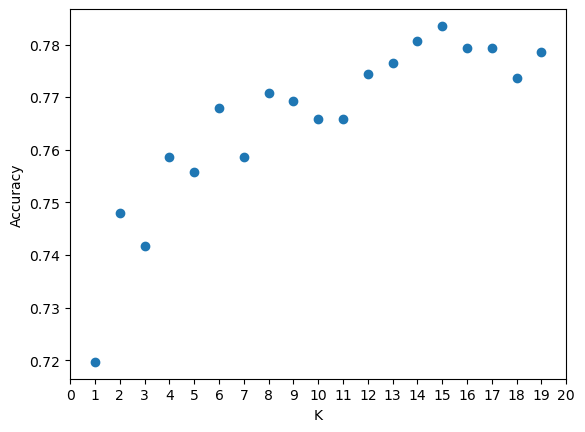

In [167]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);